In [363]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler
from math import sqrt
import findspark
df = pd.read_csv("TSLA.csv")
df.shape

(2416, 7)

In [174]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [175]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


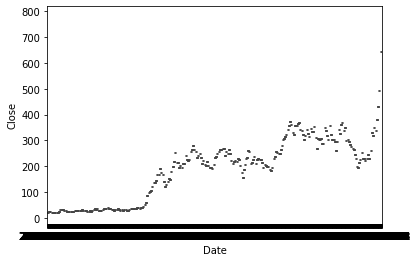

In [177]:
sns.boxplot(x='Date',y='Close',data=df)

In [184]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.998886,0.501762
High,0.999425,1.000000,0.999389,0.999640,0.999640,0.512944
Low,0.999575,0.999389,1.000000,0.999447,0.999447,0.493496
Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Adj Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Volume,0.501762,0.512944,0.493496,0.505169,0.505169,1.000000


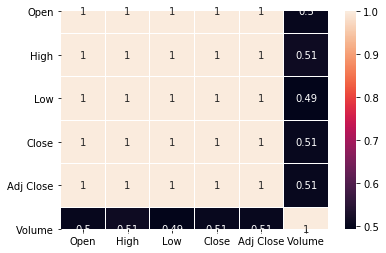

In [214]:
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr(),annot=True,linewidths=-0.1)

In [155]:
coef_val, p_val = stats.pearsonr(df['Low'],df['High'])

In [156]:
print(coef_val, p_val)

0.999389119367756 0.0


In [157]:
ocoef_val, op_val = stats.pearsonr(df['Open'],df['Close'])

In [158]:
print(ocoef_val, op_val)

0.9988859586512986 0.0


In [159]:
lm = LinearRegression()
x = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = df[['Close']]
x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

In [160]:
x_train.shape

(1691, 5)

In [161]:
x_test.shape

(725, 5)

In [162]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
pr = lm.predict(x_test)

In [164]:
pr

array([[ 31.610001],
       [210.899994],
       [ 33.810001],
       [258.179993],
       [254.339996],
       [218.960007],
       [232.559998],
       [261.380005],
       [289.959991],
       [233.029999],
       [310.220001],
       [309.579987],
       [256.950012],
       [230.009995],
       [269.48999 ],
       [ 26.93    ],
       [263.25    ],
       [218.990005],
       [650.570007],
       [ 30.799999],
       [ 27.08    ],
       [ 20.540001],
       [ 26.23    ],
       [291.230011],
       [274.829987],
       [241.220001],
       [ 29.389999],
       [265.649994],
       [240.050003],
       [210.240005],
       [ 30.809999],
       [ 26.379999],
       [ 23.84    ],
       [ 28.51    ],
       [365.220001],
       [327.220001],
       [ 20.940001],
       [283.459991],
       [238.490005],
       [290.170013],
       [317.220001],
       [375.100006],
       [ 20.639999],
       [294.079987],
       [ 33.529999],
       [ 23.459999],
       [376.790009],
       [ 30.4

In [165]:
y_test

,Close
599,31.610001
1203,210.899994
420,33.810001
2279,258.179993
1044,254.339996
...,...
555,27.370001
1195,190.570007
1379,230.460007
1220,232.949997


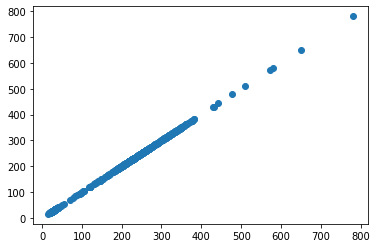

In [166]:
plt.scatter(y_test,pr)
#This ml-plot shows the exact figures of Close price as upto 400 it is very closely linked then a sudden rise in Close price
# occurs which ranges 400 to 780.

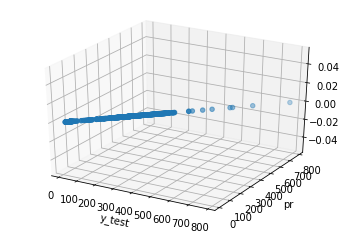

In [241]:
# 3d plot of Linear regression
ax = plt.axes(projection='3d')
ax.scatter3D(y_test,pr)
ax.set_xlabel("y_test")
ax.set_ylabel("pr")
plt.show()

In [407]:
# We are making a new column PriceDiff and calculated the difference of closing price of current row with price next to it
df['PriceDiff']=df['Close'].shift(-1)-df['Close']
# Below colum shows the difference direction if current price is lower than the price next to it so we can visualize faster
# the daily stats of stock data
df['Direction'] =[1 if df['PriceDiff'].loc[i]>0 else 0 for i in df.index]

df.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Direction
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,-0.059999,0
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,-1.870001,0
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,-2.759998,0
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,-3.090000,0
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,-0.310001,0
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,1.659999,1
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400,-0.059999,0
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600,-0.350001,0
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500,1.090000,1
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100,1.700001,1


In [199]:
findspark.init()
conf = SparkConf().setMaster('local').setAppName('PBD_Project')
sc = SparkContext(conf = conf)

In [202]:
sqlc=SQLContext(sc) 
sdf=sqlc.createDataFrame(df)

In [205]:
sdf.show()

+----------+------------------+------------------+------------------+------------------+------------------+--------+
|      Date|              Open|              High|               Low|             Close|         Adj Close|  Volume|
+----------+------------------+------------------+------------------+------------------+------------------+--------+
|2010-06-29|              19.0|              25.0|         17.540001|         23.889999|         23.889999|18766300|
|2010-06-30|         25.790001|             30.42|         23.299999|             23.83|             23.83|17187100|
|2010-07-01|              25.0|             25.92|             20.27|         21.959999|         21.959999| 8218800|
|2010-07-02|              23.0|              23.1|         18.709999|         19.200001|         19.200001| 5139800|
|2010-07-06|              20.0|              20.0|             15.83|         16.110001|         16.110001| 6866900|
|2010-07-07|              16.4|16.629998999999998|             1

In [216]:
sdf.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: long (nullable = true)



In [332]:
# this line of code is showing equivlaent results to .shape method in pandas
print(sdf.distinct().count())

2416


In [333]:
features =   ('Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume') 
assembler = VectorAssembler(inputCols=features,outputCol="features")
# sdf used below as we created spark sql DatFrame earlier in above steps
dataset=assembler.transform(sdf)
dataset.select("features").show(truncate=False)


+---------------------------------------------------------------------------------------+
|features                                                                               |
+---------------------------------------------------------------------------------------+
|[19.0,25.0,17.540001,23.889999,23.889999,1.87663E7]                                    |
|[25.790001,30.42,23.299999,23.83,23.83,1.71871E7]                                      |
|[25.0,25.92,20.27,21.959999,21.959999,8218800.0]                                       |
|[23.0,23.1,18.709999,19.200001,19.200001,5139800.0]                                    |
|[20.0,20.0,15.83,16.110001,16.110001,6866900.0]                                        |
|[16.4,16.629998999999998,14.98,15.8,15.8,6921700.0]                                    |
|[16.139999,17.52,15.57,17.459999,17.459999,7711400.0]                                  |
|[17.58,17.9,16.549999,17.4,17.4,4050600.0]                                             |
|[17.95000

In [334]:
# Trains a k-means model with k=3.
kmeans = KMeans().setK(3).setSeed(1)
model = kmeans.fit(dataset)

# Make predictions
predictions = model.transform(dataset)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))


centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.7340114755004765
Cluster Centers: 
[1.40288729e+02 1.42189958e+02 1.38335782e+02 1.40315272e+02
 1.40315272e+02 2.61437807e+06]
[2.63175204e+02 2.72169675e+02 2.54828375e+02 2.64391220e+02
 2.64391220e+02 2.10165285e+07]
[2.51761998e+02 2.56594773e+02 2.46789628e+02 2.51915947e+02
 2.51915947e+02 8.28672846e+06]


In [335]:
# Converting Spark SQl Dataframe to Spark RDD
rdd = sdf.rdd

In [336]:
# This is Spark RDD method of finding row count
# working same as pandas .shape and Spark SQL sdf.distinct().count() function previously used
rdd.count()

2416

In [337]:
# return n records, i.e in case 5 are returned
rdd.take(5)

[Row(Date='2010-06-29', Open=19.0, High=25.0, Low=17.540001, Close=23.889999, Adj Close=23.889999, Volume=18766300),
 Row(Date='2010-06-30', Open=25.790001, High=30.42, Low=23.299999, Close=23.83, Adj Close=23.83, Volume=17187100),
 Row(Date='2010-07-01', Open=25.0, High=25.92, Low=20.27, Close=21.959999, Adj Close=21.959999, Volume=8218800),
 Row(Date='2010-07-02', Open=23.0, High=23.1, Low=18.709999, Close=19.200001, Adj Close=19.200001, Volume=5139800),
 Row(Date='2010-07-06', Open=20.0, High=20.0, Low=15.83, Close=16.110001, Adj Close=16.110001, Volume=6866900)]

In [338]:
# Conversion of pandas dataframe selected data into numpy arrays and Spark Parallelized Collections

data1 =df['High'].loc['06-29-2010':'2020-12-31']
data2 =df['Low'].loc['06-29-2010':'2020-12-31']

# Converting data into numpy arrays
arr1 = np.array(data1)
arr2 = np.array(data2)
print("Arr1[1] --> "+str(arr1[1]), "Arr2[1] --> "+str(arr2[1]))

# Converting data into pyspark Parallelized Collections
KData1 = sc.parallelize(arr1)
print(KData1)

Arr1[1] --> 25.92 Arr2[1] --> 20.27
ParallelCollectionRDD[344] at readRDDFromFile at PythonRDD.scala:262


In [339]:
# Selecting Records(Open & Close) of 2010 in data1 and data2, 
data1 =df['Open'].loc['01-01-2010':'2010-12-31']
data2 =df['Close'].loc['01-01-2010':'2010-12-31']
print(data1.iloc[0:5])
print(data2.iloc[0:5])




1    25.790001
2    25.000000
3    23.000000
4    20.000000
5    16.400000
Name: Open, dtype: float64
1    23.830000
2    21.959999
3    19.200001
4    16.110001
5    15.800000
Name: Close, dtype: float64


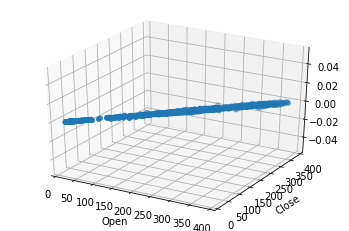

In [340]:
ax = plt.axes(projection='3d')
ax.scatter3D(data1,data2)
ax.set_xlabel("Open")
ax.set_ylabel("Close")
plt.show()


In [365]:
d=df.loc['01-01-2010':'2020-12-31']
df['LogReturn'] = np.log(df['Close']).shift(-1) - np.log(df['Close'])
du = df['LogReturn'].mean()
sigma = df['LogReturn'].std(ddof=1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,LogReturn
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,-0.002515
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,-0.081723
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,-0.134312
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,-0.175470
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,-0.019430


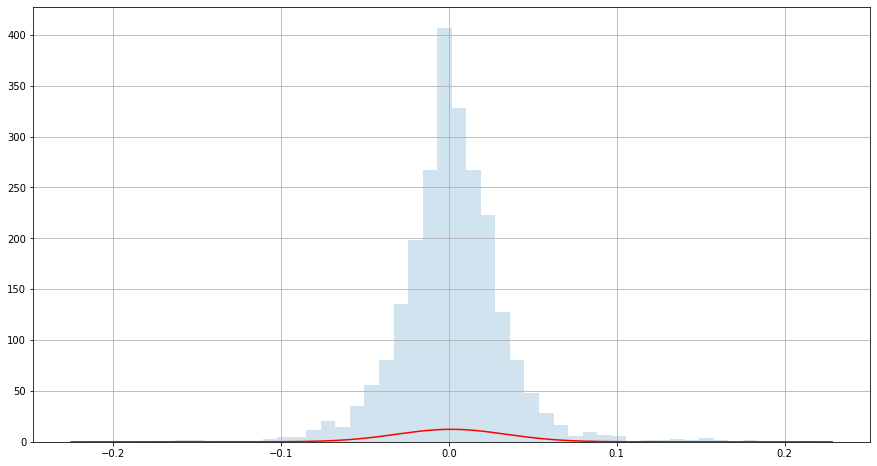

In [375]:
density = pd.DataFrame()
density['x'] = np.arange(df['LogReturn'].min()-0.01, df['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], du, sigma)
ax= df['LogReturn']
ax.hist(bins=50, figsize=(15, 8), histtype='stepfilled', alpha=0.2, label='norm pdf')
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [410]:
# Binning of Price Difference to see Price_Closing with Direction, You can see Price is increased where Direction is 1 
# and vice versa

bins = [-800, 0, 800]
Price_Closing = ["Price Decreased","Price Increased"]
df["Price_Closing"] = pd.cut(df["PriceDiff"], bins, labels=Price_Closing)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Direction,Price_Closing
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,-0.059999,0,Price Decreased
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,-1.870001,0,Price Decreased
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,-2.759998,0,Price Decreased
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,-3.090000,0,Price Decreased
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,-0.310001,0,Price Decreased
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,1.659999,1,Price Increased
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400,-0.059999,0,Price Decreased
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600,-0.350001,0,Price Decreased
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500,1.090000,1,Price Increased
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100,1.700001,1,Price Increased
